<a href="https://colab.research.google.com/github/santoshkumarbvp/Deep-Learning/blob/main/MNIST_fashion_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Thu Jan  7 06:03:43 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.27.04    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P0    25W /  75W |    227MiB /  7611MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## The Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## Visualizing the Data

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [ ]:
x_train[0].shape, x_train.shape

((28, 28), (60000, 28, 28))

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

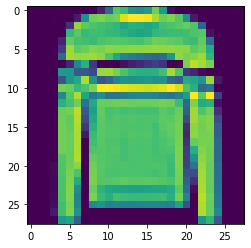

In [ ]:
plt.imshow(x_train[5])

## Preprocessing the Data

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [ ]:
x_train=x_train/255
x_test=x_test/255

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [ ]:
x_test.shape, x_train.shape

((10000, 28, 28), (60000, 28, 28))

In [ ]:
import numpy as np

In [ ]:
x_test=np.expand_dims(x_test, axis=-1)
x_train=np.expand_dims(x_train, axis=-1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_test = to_categorical(y_test)

In [ ]:
y_train = to_categorical(y_train)

## Building the Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=32 and kernel_size=(4,4)
* Pooling Layer where pool_size = (2,2)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D

from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()
model.add(Conv2D(kernel_size=(4,4),filters=32,input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'])


In [ ]:
es = EarlyStopping(monitor='accuracy',patience=3)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

### Training the Model
**TASK 6: Train/Fit the model to the x_train set. Amount of epochs is up to you.**

In [ ]:
model.fit(x_train,y_train,batch_size=32,validation_data=(x_test,y_test),epochs=20, callbacks=[es])

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2710 - accuracy: 0.9024 - val_loss: 0.2938 - val_accuracy: 0.8953
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2252 - accuracy: 0.9173 - val_loss: 0.2858 - val_accuracy: 0.8999
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1943 - accuracy: 0.9307 - val_loss: 0.3000 - val_accuracy: 0.9023
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1696 - accuracy: 0.9382 - val_loss: 0.3027 - val_accuracy: 0.9019
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1491 - accuracy: 0.9460 - val_loss: 0.3200 - val_accuracy: 0.9058
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1319 - accuracy: 0.9532 - val_loss: 0.3065 - val_accuracy: 0.9076
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1178 - accuracy: 0.9582 - val_loss: 0.3527 - val_accuracy:

### Evaluating the Model

**TASK 7: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.8311 - accuracy: 0.9046


[0.8311181664466858, 0.9046000242233276]

In [ ]:
pred =model.predict(x_test)

In [ ]:
pred_i= np.array([np.argmax(i) for i in pred])
y_test_i= np.array([np.argmax(i) for i in y_test])

In [ ]:
pred_i.shape

(10000,)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
confusion_matrix(y_test_i,pred_i)

array([[834,   0,  26,  16,   4,   2, 112,   0,   5,   1],
       [  3, 972,   2,  13,   5,   0,   4,   0,   1,   0],
       [ 12,   0, 854,  11,  67,   1,  53,   0,   2,   0],
       [  9,   4,  12, 908,  37,   0,  24,   0,   5,   1],
       [  1,   0,  56,  22, 862,   0,  59,   0,   0,   0],
       [  0,   0,   0,   0,   0, 988,   1,   6,   2,   3],
       [ 90,   0,  62,  29,  62,   0, 744,   0,  12,   1],
       [  0,   0,   0,   0,   0,  34,   0, 940,   1,  25],
       [  1,   0,   3,   6,   2,   1,   5,   2, 977,   3],
       [  0,   0,   0,   0,   0,  10,   0,  23,   0, 967]])

In [ ]:
accuracy_score(y_test_i,pred_i)

0.9046

In [ ]:
print(classification_report(y_test_i,pred_i))

              precision    recall  f1-score   support

           0       0.88      0.83      0.86      1000
           1       1.00      0.97      0.98      1000
           2       0.84      0.85      0.85      1000
           3       0.90      0.91      0.91      1000
           4       0.83      0.86      0.85      1000
           5       0.95      0.99      0.97      1000
           6       0.74      0.74      0.74      1000
           7       0.97      0.94      0.95      1000
           8       0.97      0.98      0.97      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



# Great Job! lets do same through vgg16